# INM363 Deep Active Learning Network for Medical Image Segmentation

## Results

### Aaron Mir (Student Number: 160001207)

### https://github.com/Assassinsarms/Deep-Active-Learning-Network-for-Medical-Image-Segmentation

In [1]:
from glob import glob
import os
import sys

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import matplotlib.image as mpimg

import pickle
import pandas as pd

In [2]:
TRAIN_IMG_DIR = pickle.load(open('data\\train_val\\img\\'+'train_val.data', 'rb'))
TRAIN_LABEL_DIR = pickle.load(open('data\\train_val\\label\\'+'train_val.mask', 'rb'))
UNLABELLED_IMG_DIR = pickle.load(open('data\\unlabelled\\img\\'+'unlabelled.data', 'rb'))
UNLABELLED_LABEL_DIR = pickle.load(open('data\\unlabelled\\label\\'+'unlabelled.mask', 'rb'))
TEST_IMG_DIR = pickle.load(open('data\\test\\img\\'+'test.data', 'rb'))
TEST_LABEL_DIR = pickle.load(open('data\\test\\label\\'+'test.mask', 'rb'))

## Training and Validation Loss and Mean Dice Score for Base Training

In [3]:
training_log_df = pd.read_csv('base_training_results\\log.csv')

In [19]:
training_log_df.head()

,epoch,lr,loss,iou,dice,val_loss,val_iou,val_dice
0,0.0,0.001,1.162492,0.218158,0.098907,1.704908,0.049399,0.085996
1,1.0,0.001,1.016108,0.352841,0.150386,0.961865,0.405781,0.184081
2,2.0,0.001,0.896945,0.407199,0.225784,0.843503,0.465812,0.262248
3,3.0,0.001,0.768668,0.472474,0.342770,0.724799,0.492958,0.383875
4,4.0,0.001,0.663837,0.484587,0.453882,0.656494,0.538079,0.474462


In [20]:
training_loss = training_log_df['loss'].to_numpy()
training_dice = training_log_df['dice'].to_numpy()
validation_loss = training_log_df['val_loss'].to_numpy()
validation_dice = training_log_df['val_dice'].to_numpy()

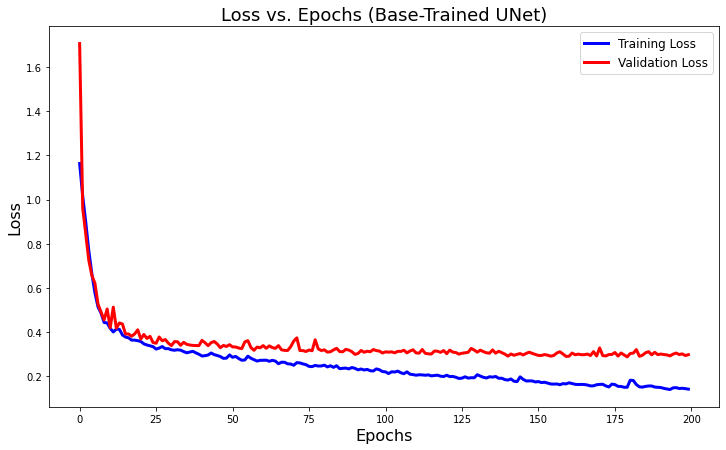

In [21]:
plt.figure(figsize=(12, 7))
plt.plot(training_loss, 'b', linewidth=3.0, label='Training Loss')
plt.plot(validation_loss, 'r', linewidth=3.0, label='Validation Loss')
plt.title('Loss vs. Epochs (Base-Trained UNet)', fontsize=18)
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.legend(fontsize=12)
#plt.savefig('base_training_results/LossvsEpochsUNet.png')
plt.show()

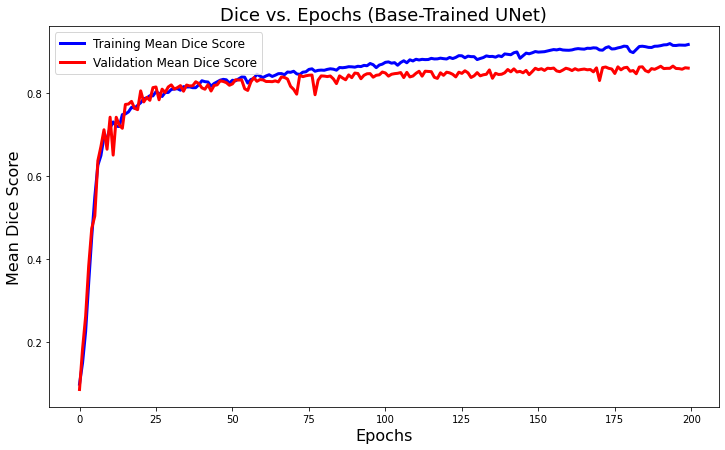

In [22]:
plt.figure(figsize=(12, 7))
plt.plot(training_dice, 'b', linewidth=3.0, label='Training Mean Dice Score')
plt.plot(validation_dice, 'r', linewidth=3.0, label='Validation Mean Dice Score')
plt.title('Dice vs. Epochs (Base-Trained UNet)', fontsize=18)
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Mean Dice Score', fontsize=16)
plt.legend(fontsize=12)
#plt.savefig('base_training_results\DicevsEpochsUNet.png')
plt.show()

## Example Prediction, Slice and Ground Truth

In [5]:
example_prediction = 'active_learning_results\\examples\\pred_Brats18_CBICA_ALU_1_67.png'
example_slice = np.load('active_learning_results\\examples\\slice_Brats18_CBICA_ALU_1_67.npy')
example_gt = 'active_learning_results\\examples\\label_Brats18_CBICA_ALU_1_67.png'

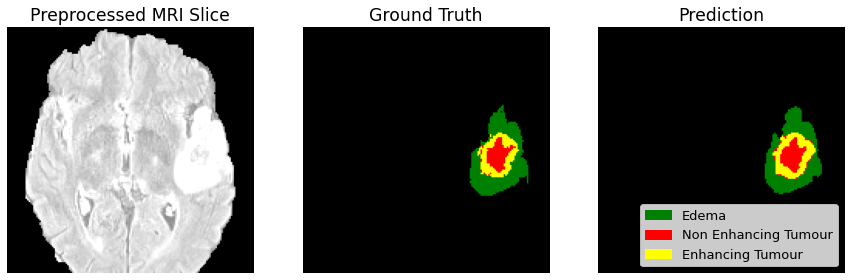

In [24]:
fig, axs = plt.subplots(1,3, figsize=(15,15))
axs[0].imshow(example_slice[:,:,0],cmap='gray')
axs[0].set_title("Preprocessed MRI Slice", size ='xx-large')
axs[0].axis("off")
axs[1].imshow(mpimg.imread(example_gt), cmap='gray')
axs[1].set_title("Ground Truth", size ='xx-large')
axs[1].axis("off")
axs[2].imshow(mpimg.imread(example_prediction))
axs[2].set_title("Prediction", size ='xx-large')
axs[2].axis("off")
df_legend = pd.DataFrame([[0, [0, 128, 0], 'Edema'],
                          [1, [255, 0, 0], 'Non Enhancing Tumour'],
                          [2, [255, 255, 0], 'Enhancing Tumour']],
                         columns=['key', 'color', 'name'])
handles_1 = [Rectangle((0, 0), 1, 1, color=[c / 255 for c in color_list]) for color_list in df_legend['color']]
labels = df_legend['name']
plt.legend(handles_1, labels, loc='lower right', fontsize=13)
plt.show()

## Prediction and Uncertainty Maps evolution over 10 Active Learning iterations

In [3]:
example_slice = np.load("avg_predictions_uncertainty_maps\\example_slice\\Brats18_CBICA_APY_1_100.npy")
example_mask = np.load("avg_predictions_uncertainty_maps\\example_label\\Brats18_CBICA_APY_1_100.npy") 

In [5]:
# avg_predictions_iteration_1 = np.load("avg_predictions_uncertainty_maps\\iteration_0\\avg_predictions.npy")
avg_predictions_iteration_2 = np.load("avg_predictions_uncertainty_maps\\iteration_1\\avg_predictions.npy")
# avg_predictions_iteration_3 = np.load("avg_predictions_uncertainty_maps\\iteration_2\\avg_predictions.npy")
avg_predictions_iteration_4 = np.load("avg_predictions_uncertainty_maps\\iteration_3\\avg_predictions.npy")
# avg_predictions_iteration_5 = np.load("avg_predictions_uncertainty_maps\\iteration_4\\avg_predictions.npy")
avg_predictions_iteration_6 = np.load("avg_predictions_uncertainty_maps\\iteration_5\\avg_predictions.npy")
# avg_predictions_iteration_7 = np.load("avg_predictions_uncertainty_maps\\iteration_6\\avg_predictions.npy")
avg_predictions_iteration_8 = np.load("avg_predictions_uncertainty_maps\\iteration_7\\avg_predictions.npy")
# avg_predictions_iteration_9 = np.load("avg_predictions_uncertainty_maps\\iteration_8\\avg_predictions.npy")
avg_predictions_iteration_10 = np.load("avg_predictions_uncertainty_maps\\iteration_9\\avg_predictions.npy")

In [6]:
# uncertainty_maps_iteration_1 = np.load("avg_predictions_uncertainty_maps\\iteration_0\\uncertainty_maps.npy")
uncertainty_maps_iteration_2 = np.load("avg_predictions_uncertainty_maps\\iteration_1\\uncertainty_maps.npy")
# uncertainty_maps_iteration_3 = np.load("avg_predictions_uncertainty_maps\\iteration_2\\uncertainty_maps.npy")
uncertainty_maps_iteration_4 = np.load("avg_predictions_uncertainty_maps\\iteration_3\\uncertainty_maps.npy")
# uncertainty_maps_iteration_5 = np.load("avg_predictions_uncertainty_maps\\iteration_4\\uncertainty_maps.npy")
uncertainty_maps_iteration_6 = np.load("avg_predictions_uncertainty_maps\\iteration_5\\uncertainty_maps.npy")
# uncertainty_maps_iteration_7 = np.load("avg_predictions_uncertainty_maps\\iteration_6\\uncertainty_maps.npy")
uncertainty_maps_iteration_8 = np.load("avg_predictions_uncertainty_maps\\iteration_7\\uncertainty_maps.npy")
# uncertainty_maps_iteration_9 = np.load("avg_predictions_uncertainty_maps\\iteration_8\\uncertainty_maps.npy")
uncertainty_maps_iteration_10 = np.load("avg_predictions_uncertainty_maps\\iteration_9\\uncertainty_maps.npy")

In [7]:
rgbPic_gt = np.zeros([160, 160, 3], dtype=np.uint8)
rgbPic_avg_iteration2 = np.zeros([160, 160, 3], dtype=np.uint8)
rgbPic_avg_iteration4 = np.zeros([160, 160, 3], dtype=np.uint8)
rgbPic_avg_iteration6 = np.zeros([160, 160, 3], dtype=np.uint8)
rgbPic_avg_iteration8 = np.zeros([160, 160, 3], dtype=np.uint8)
rgbPic_avg_iteration10 = np.zeros([160, 160, 3], dtype=np.uint8)
for idx in range(avg_predictions_iteration_2.shape[2]):
        for idy in range(avg_predictions_iteration_2.shape[3]):
            #(ED, peritumoral edema) (label 2) green
            if example_mask[idx,idy] == 2:
                rgbPic_gt[idx,idy, 0] = 0
                rgbPic_gt[idx,idy, 1] = 128
                rgbPic_gt[idx,idy, 2] = 0
            if avg_predictions_iteration_2[0,0,idx,idy] > 0.5:
                rgbPic_avg_iteration2[idx, idy, 0] = 0
                rgbPic_avg_iteration2[idx, idy, 1] = 128
                rgbPic_avg_iteration2[idx, idy, 2] = 0
            if avg_predictions_iteration_4[0,0,idx,idy] > 0.5:
                rgbPic_avg_iteration4[idx, idy, 0] = 0
                rgbPic_avg_iteration4[idx, idy, 1] = 128
                rgbPic_avg_iteration4[idx, idy, 2] = 0
            if avg_predictions_iteration_6[0,0,idx,idy] > 0.5:
                rgbPic_avg_iteration6[idx, idy, 0] = 0
                rgbPic_avg_iteration6[idx, idy, 1] = 128
                rgbPic_avg_iteration6[idx, idy, 2] = 0
            if avg_predictions_iteration_8[0,0,idx,idy] > 0.5:
                rgbPic_avg_iteration8[idx, idy, 0] = 0
                rgbPic_avg_iteration8[idx, idy, 1] = 128
                rgbPic_avg_iteration8[idx, idy, 2] = 0
            if avg_predictions_iteration_10[0,0,idx,idy] > 0.5:
                rgbPic_avg_iteration10[idx, idy, 0] = 0
                rgbPic_avg_iteration10[idx, idy, 1] = 128
                rgbPic_avg_iteration10[idx, idy, 2] = 0
            #(NET, non-enhancing tumor) (label 1) red
            if example_mask[idx,idy] == 1:
                rgbPic_gt[idx,idy, 0] = 255
                rgbPic_gt[idx,idy, 1] = 0
                rgbPic_gt[idx,idy, 2] = 0
            if avg_predictions_iteration_2[0,1,idx,idy] > 0.5:
                rgbPic_avg_iteration2[idx, idy, 0] = 255
                rgbPic_avg_iteration2[idx, idy, 1] = 0
                rgbPic_avg_iteration2[idx, idy, 2] = 0
            if avg_predictions_iteration_4[0,1,idx,idy] > 0.5:
                rgbPic_avg_iteration4[idx, idy, 0] = 255
                rgbPic_avg_iteration4[idx, idy, 1] = 0
                rgbPic_avg_iteration4[idx, idy, 2] = 0
            if avg_predictions_iteration_6[0,1,idx,idy] > 0.5:
                rgbPic_avg_iteration6[idx, idy, 0] = 255
                rgbPic_avg_iteration6[idx, idy, 1] = 0
                rgbPic_avg_iteration6[idx, idy, 2] = 0
            if avg_predictions_iteration_8[0,1,idx,idy] > 0.5:
                rgbPic_avg_iteration8[idx, idy, 0] = 255
                rgbPic_avg_iteration8[idx, idy, 1] = 0
                rgbPic_avg_iteration8[idx, idy, 2] = 0
            if avg_predictions_iteration_10[0,1,idx,idy] > 0.5:
                rgbPic_avg_iteration10[idx, idy, 0] = 255
                rgbPic_avg_iteration10[idx, idy, 1] = 0
                rgbPic_avg_iteration10[idx, idy, 2] = 0
            #(ET, enhancing tumor)(label 4) yellow
            if example_mask[idx,idy] == 4:
                rgbPic_gt[idx,idy, 0] = 255
                rgbPic_gt[idx,idy, 1] = 255
                rgbPic_gt[idx,idy, 2] = 0
            if avg_predictions_iteration_2[0,2,idx,idy] > 0.5:
                rgbPic_avg_iteration2[idx, idy, 0] = 255
                rgbPic_avg_iteration2[idx, idy, 1] = 255
                rgbPic_avg_iteration2[idx, idy, 2] = 0
            if avg_predictions_iteration_4[0,2,idx,idy] > 0.5:
                rgbPic_avg_iteration4[idx, idy, 0] = 255
                rgbPic_avg_iteration4[idx, idy, 1] = 255
                rgbPic_avg_iteration4[idx, idy, 2] = 0
            if avg_predictions_iteration_6[0,2,idx,idy] > 0.5:
                rgbPic_avg_iteration6[idx, idy, 0] = 255
                rgbPic_avg_iteration6[idx, idy, 1] = 255
                rgbPic_avg_iteration6[idx, idy, 2] = 0
            if avg_predictions_iteration_8[0,2,idx,idy] > 0.5:
                rgbPic_avg_iteration8[idx, idy, 0] = 255
                rgbPic_avg_iteration8[idx, idy, 1] = 255
                rgbPic_avg_iteration8[idx, idy, 2] = 0
            if avg_predictions_iteration_10[0,2,idx,idy] > 0.5:
                rgbPic_avg_iteration10[idx, idy, 0] = 255
                rgbPic_avg_iteration10[idx, idy, 1] = 255
                rgbPic_avg_iteration10[idx, idy, 2] = 0

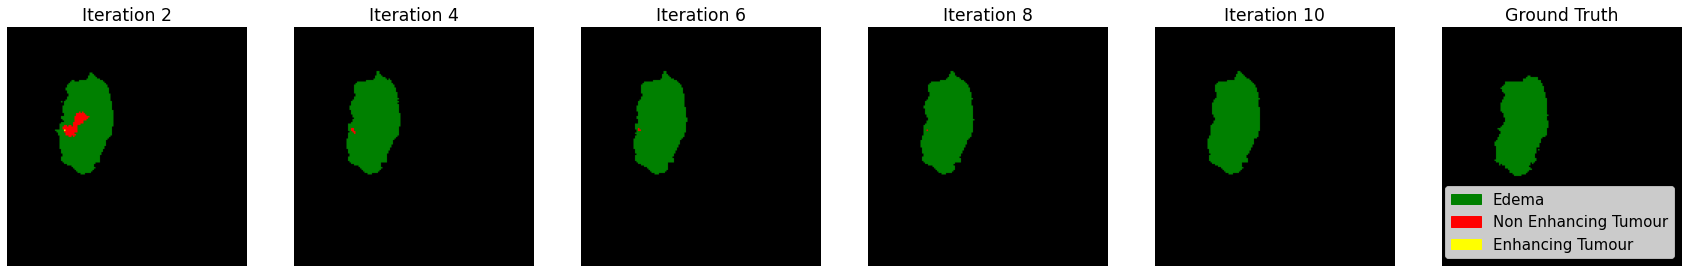

In [25]:
fig, axs = plt.subplots(1,6, figsize=(30,30))
axs[0].imshow(rgbPic_avg_iteration2)
axs[0].set_title("Iteration 2", size ='xx-large')
axs[0].axis("off")
axs[1].imshow(rgbPic_avg_iteration4)
axs[1].set_title("Iteration 4", size ='xx-large')
axs[1].axis("off")
axs[2].imshow(rgbPic_avg_iteration6)
axs[2].set_title("Iteration 6", size ='xx-large')
axs[2].axis("off")
axs[3].imshow(rgbPic_avg_iteration8)
axs[3].set_title("Iteration 8", size ='xx-large')
axs[3].axis("off")
axs[4].imshow(rgbPic_avg_iteration10)
axs[4].set_title("Iteration 10", size ='xx-large')
axs[4].axis("off")
axs[5].imshow(rgbPic_gt)
axs[5].set_title("Ground Truth", size ='xx-large')
axs[5].axis("off")
df_legend = pd.DataFrame([[0, [0, 128, 0], 'Edema'],
                          [1, [255, 0, 0], 'Non Enhancing Tumour'],
                          [2, [255, 255, 0], 'Enhancing Tumour']],
                         columns=['key', 'color', 'name'])
handles_1 = [Rectangle((0, 0), 1, 1, color=[c / 255 for c in color_list]) for color_list in df_legend['color']]
labels = df_legend['name']
plt.legend(handles_1, labels, loc='lower right', fontsize=15)
# plt.savefig('avg_predictions_uncertainty_maps/predictions.jpg')
plt.show()

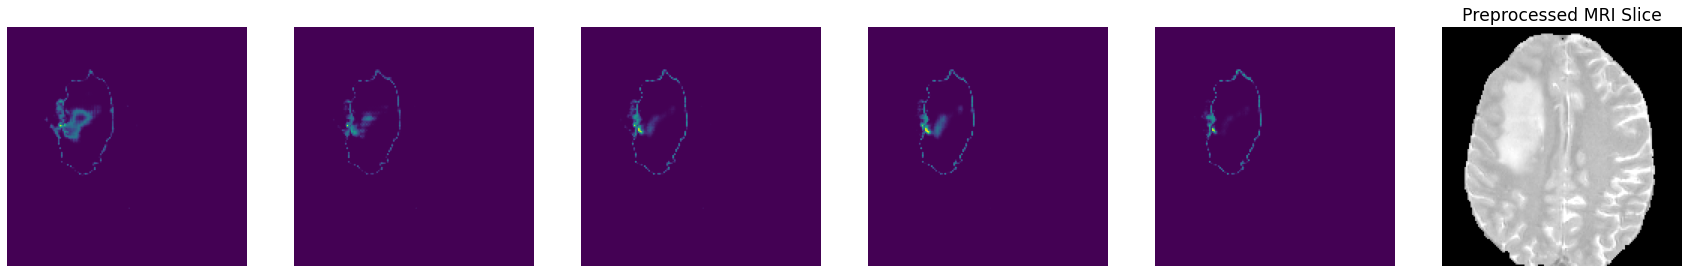

In [26]:
fig, axs = plt.subplots(1,6, figsize=(30,30))
axs[0].imshow(uncertainty_maps_iteration_2[0])
# axs[0].set_title("Uncertainty Map at iteration 2", size ='xx-large')
axs[0].axis("off")
axs[1].imshow(uncertainty_maps_iteration_4[0])
# axs[1].set_title("Uncertainty Map at iteration 4", size ='xx-large')
axs[1].axis("off")
axs[2].imshow(uncertainty_maps_iteration_6[0])
# axs[2].set_title("Uncertainty Map at iteration 6", size ='xx-large')
axs[2].axis("off")
axs[3].imshow(uncertainty_maps_iteration_8[0])
# axs[3].set_title("Uncertainty Map at iteration 8", size ='xx-large')
axs[3].axis("off")
axs[4].imshow(uncertainty_maps_iteration_10[0])
# axs[4].set_title("Uncertainty Map at iteration 10", size ='xx-large')
axs[4].axis("off")
axs[5].imshow(example_slice[:,:,3], cmap='gray')
axs[5].set_title("Preprocessed MRI Slice", size ='xx-large')
axs[5].axis("off")
# cbar_ax = fig.add_axes([0.92, 0.447, 0.01, 0.11])
# cbar = fig.colorbar(im, cax=cbar_ax, fraction=0.046, pad=0.04, ticks = [0, 0.7])
# cbar.ax.set_yticklabels(['Less Uncertain', 'More Uncertain'])
# cbar.ax.tick_params(labelsize='xx-large')
# plt.savefig('avg_predictions_uncertainty_maps/uncertainty_maps.jpg')
plt.show()

## Active Learning vs. Random Baseline Test Results

In [27]:
# loading in the mean Dice, precision, recall and Hausdorff scores for all classes for active learning and 
# random learning across all learning iterations and 3 experiments for active learning and 3 experiments for random learning
mean_WT_dice_active = np.load("active_learning_results\\mean_WT_dice.npy")
mean_TC_dice_active = np.load("active_learning_results\\mean_TC_dice.npy")
mean_ET_dice_active = np.load("active_learning_results\\mean_ET_dice.npy")
mean_WT_precision_active = np.load("active_learning_results\\mean_WT_precision.npy")
mean_TC_precision_active = np.load("active_learning_results\\mean_TC_precision.npy")
mean_ET_precision_active = np.load("active_learning_results\\mean_ET_precision.npy")
mean_WT_recall_active = np.load("active_learning_results\\mean_WT_recall.npy")
mean_TC_recall_active = np.load("active_learning_results\\mean_TC_recall.npy")
mean_ET_recall_active = np.load("active_learning_results\\mean_ET_recall.npy")
mean_WT_Hausdorff_active = np.load("active_learning_results\\mean_WT_Hausdorff.npy")
mean_TC_Hausdorff_active = np.load("active_learning_results\\mean_TC_Hausdorff.npy")
mean_ET_Hausdorff_active = np.load("active_learning_results\\mean_ET_Hausdorff.npy")

mean_WT_dice_random = np.load("random_learning_results\\mean_WT_dice.npy")
mean_TC_dice_random = np.load("random_learning_results\\mean_TC_dice.npy")
mean_ET_dice_random = np.load("random_learning_results\\mean_ET_dice.npy")
mean_WT_precision_random = np.load("random_learning_results\\mean_WT_precision.npy")
mean_TC_precision_random = np.load("random_learning_results\\mean_TC_precision.npy")
mean_ET_precision_random = np.load("random_learning_results\\mean_ET_precision.npy")
mean_WT_recall_random = np.load("random_learning_results\\mean_WT_recall.npy")
mean_TC_recall_random = np.load("random_learning_results\\mean_TC_recall.npy")
mean_ET_recall_random = np.load("random_learning_results\\mean_ET_recall.npy")
mean_WT_Hausdorff_random = np.load("random_learning_results\\mean_WT_Hausdorff.npy")
mean_TC_Hausdorff_random = np.load("random_learning_results\\mean_TC_Hausdorff.npy")
mean_ET_Hausdorff_random = np.load("random_learning_results\\mean_ET_Hausdorff.npy")

In [28]:
# calculate the average of each metric across the 3 experiments for active learning and 3 experiments for random learning
mean_WT_dice_iterations_active = mean_WT_dice_active.mean(axis=0)
mean_TC_dice_iterations_active = mean_TC_dice_active.mean(axis=0)
mean_ET_dice_iterations_active = mean_ET_dice_active.mean(axis=0)
dice_active = np.vstack((mean_WT_dice_iterations_active, mean_TC_dice_iterations_active, mean_ET_dice_iterations_active)).mean(axis=0)
mean_WT_precision_iterations_active = mean_WT_precision_active.mean(axis=0)
mean_TC_precision_iterations_active = mean_TC_precision_active.mean(axis=0)
mean_ET_precision_iterations_active = mean_ET_precision_active.mean(axis=0)
precision_active = np.vstack((mean_WT_precision_iterations_active, mean_TC_precision_iterations_active, mean_ET_precision_iterations_active)).mean(axis=0)
mean_WT_recall_iterations_active = mean_WT_recall_active.mean(axis=0)
mean_TC_recall_iterations_active = mean_TC_recall_active.mean(axis=0)
mean_ET_recall_iterations_active = mean_ET_recall_active.mean(axis=0)
recall_active = np.vstack((mean_WT_recall_iterations_active, mean_TC_recall_iterations_active, mean_ET_recall_iterations_active)).mean(axis=0)
mean_WT_Hausdorff_iterations_active = mean_WT_Hausdorff_active.mean(axis=0)
mean_TC_Hausdorff_iterations_active = mean_TC_Hausdorff_active.mean(axis=0)
mean_ET_Hausdorff_iterations_active = mean_ET_Hausdorff_active.mean(axis=0)
Hausdorff_active = np.vstack((mean_WT_Hausdorff_iterations_active, mean_TC_Hausdorff_iterations_active, mean_ET_Hausdorff_iterations_active)).mean(axis=0)

mean_WT_dice_iterations_random = mean_WT_dice_random.mean(axis=0)
mean_TC_dice_iterations_random = mean_TC_dice_random.mean(axis=0)
mean_ET_dice_iterations_random = mean_ET_dice_random.mean(axis=0)
dice_random = np.vstack((mean_WT_dice_iterations_random, mean_TC_dice_iterations_random, mean_ET_dice_iterations_random)).mean(axis=0)
mean_WT_precision_iterations_random = mean_WT_precision_random.mean(axis=0)
mean_TC_precision_iterations_random = mean_TC_precision_random.mean(axis=0)
mean_ET_precision_iterations_random = mean_ET_precision_random.mean(axis=0)
precision_random = np.vstack((mean_WT_precision_iterations_random, mean_TC_precision_iterations_random, mean_ET_precision_iterations_random)).mean(axis=0)
mean_WT_recall_iterations_random = mean_WT_recall_random.mean(axis=0)
mean_TC_recall_iterations_random = mean_TC_recall_random.mean(axis=0)
mean_ET_recall_iterations_random = mean_ET_recall_random.mean(axis=0)
recall_random = np.vstack((mean_WT_recall_iterations_random, mean_TC_recall_iterations_random, mean_ET_recall_iterations_random)).mean(axis=0)
mean_WT_Hausdorff_iterations_random = mean_WT_Hausdorff_random.mean(axis=0)
mean_TC_Hausdorff_iterations_random = mean_TC_Hausdorff_random.mean(axis=0)
mean_ET_Hausdorff_iterations_random = mean_ET_Hausdorff_random.mean(axis=0)
Hausdorff_random = np.vstack((mean_WT_Hausdorff_iterations_random, mean_TC_Hausdorff_iterations_random, mean_ET_Hausdorff_iterations_random)).mean(axis=0)

### Dice on Test Set, compared with Random Baseline averaged over 3 experiments (higher is better)

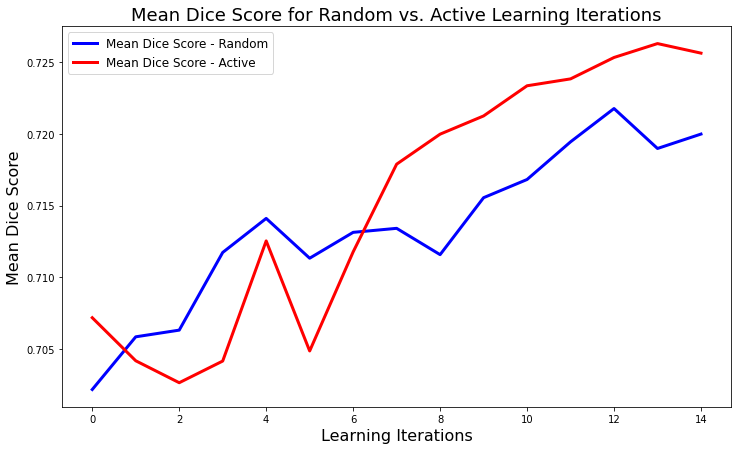

In [50]:
plt.figure(figsize=(12, 7))
plt.plot(dice_random, 'b', linewidth=3.0, label='Mean Dice Score - Random')
plt.plot(dice_active, 'r', linewidth=3.0, label='Mean Dice Score - Active')
plt.title('Mean Dice Score for Random vs. Active Learning Iterations', fontsize=18)
plt.xlabel('Learning Iterations', fontsize=16)
plt.ylabel('Mean Dice Score', fontsize=16)
plt.legend(fontsize=12)
#plt.savefig('comparison_results/Dice.png')
plt.show()

### Precision on Test Set, compared with Random Baseline averaged over 3 experiments (higher is better)

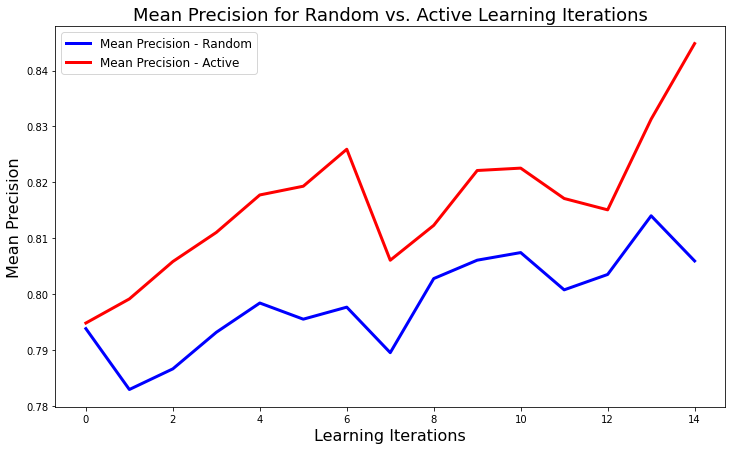

In [29]:
plt.figure(figsize=(12, 7))
plt.plot(precision_random, 'b', linewidth=3.0, label='Mean Precision - Random')
plt.plot(precision_active, 'r', linewidth=3.0, label='Mean Precision - Active')
plt.title('Mean Precision for Random vs. Active Learning Iterations', fontsize=18)
plt.xlabel('Learning Iterations', fontsize=16)
plt.ylabel('Mean Precision', fontsize=16)
plt.legend(fontsize=12)
# plt.savefig('comparison_results/Precision.png')
plt.show()

### Recall on Test Set, compared with Random Baseline averaged over 3 experiments (higher is better)

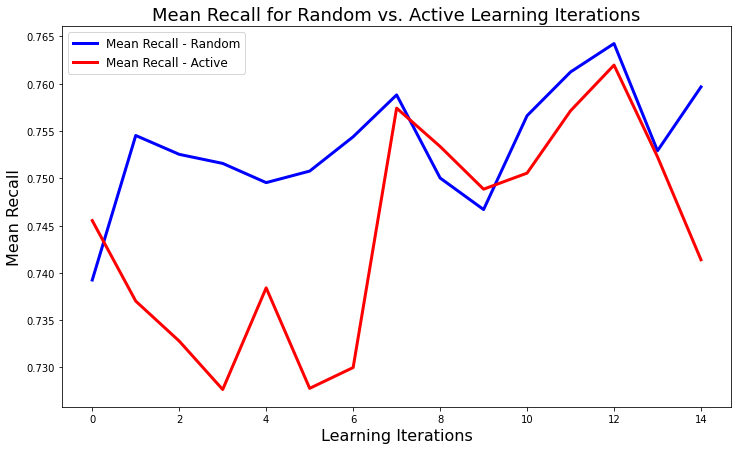

In [30]:
plt.figure(figsize=(12, 7))
plt.plot(recall_random, 'b', linewidth=3.0, label='Mean Recall - Random')
plt.plot(recall_active, 'r', linewidth=3.0, label='Mean Recall - Active')
plt.title('Mean Recall for Random vs. Active Learning Iterations', fontsize=18)
plt.xlabel('Learning Iterations', fontsize=16)
plt.ylabel('Mean Recall', fontsize=16)
plt.legend(fontsize=12)
# plt.savefig('comparison_results/Recall.png')
plt.show()

### Hausdorff on Test Set, compared with Random Baseline averaged over 3 experiments (lower is better)

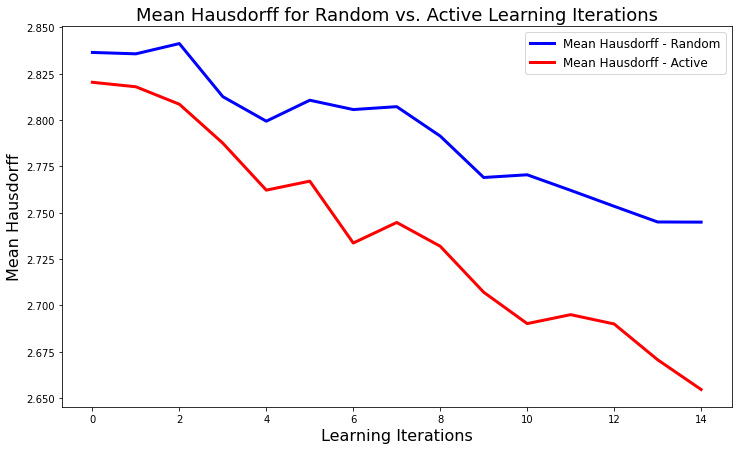

In [53]:
plt.figure(figsize=(12, 7))
plt.plot(Hausdorff_random, 'b', linewidth=3.0, label='Mean Hausdorff - Random')
plt.plot(Hausdorff_active, 'r', linewidth=3.0, label='Mean Hausdorff - Active')
plt.title('Mean Hausdorff for Random vs. Active Learning Iterations', fontsize=18)
plt.xlabel('Learning Iterations', fontsize=16)
plt.ylabel('Mean Hausdorff', fontsize=16)
plt.legend(fontsize=12)
#plt.savefig('comparison_results/Hausdorff.png')
plt.show()

## Base-Trained Model vs. Actively-Trained Model vs. Random-Trained Model

In [5]:
# load the results from the base-trained segmentation model
mean_WT_dice_base = float(np.load("base_test_results\\mean_WT_dice.npy"))
mean_TC_dice_base = float(np.load("base_test_results\\mean_TC_dice.npy"))
mean_ET_dice_base = float(np.load("base_test_results\\mean_ET_dice.npy"))
dice_base = np.mean((mean_WT_dice_base, mean_TC_dice_base, mean_ET_dice_base))
mean_WT_precision_base = float(np.load("base_test_results\\mean_WT_precision.npy"))
mean_TC_precision_base = float(np.load("base_test_results\\mean_TC_precision.npy"))
mean_ET_precision_base = float(np.load("base_test_results\\mean_ET_precision.npy"))
precision_base = np.mean((mean_WT_precision_base, mean_TC_precision_base, mean_ET_precision_base))
mean_WT_recall_base = float(np.load("base_test_results\\mean_WT_recall.npy"))
mean_TC_recall_base = float(np.load("base_test_results\\mean_TC_recall.npy"))
mean_ET_recall_base = float(np.load("base_test_results\\mean_ET_recall.npy"))
recall_base = np.mean((mean_WT_recall_base, mean_TC_recall_base, mean_ET_recall_base))
mean_WT_Hausdorff_base = float(np.load("base_test_results\\mean_WT_Hausdorff.npy"))
mean_TC_Hausdorff_base = float(np.load("base_test_results\\mean_TC_Hausdorff.npy"))
mean_ET_Hausdorff_base = float(np.load("base_test_results\\mean_ET_Hausdorff.npy"))
Hausdorff_base = np.mean((mean_WT_Hausdorff_base, mean_TC_Hausdorff_base, mean_ET_Hausdorff_base))

In [31]:
# load the final table of results comparing the base-trained model to the actively trained model and the randomly trained model
base_vs_random_vs_active_df = pd.read_csv("comparison_results\\Basevs.Activevs.Random.csv")

In [32]:
base_vs_random_vs_active_df

,Metric,WT,ET,TC,All Classes
0,Dice Score (Base),0.757,0.619,0.724,0.700
1,Dice Score (Random),0.773,0.654,0.732,0.720
2,Dice Score (Active),0.762,0.654,0.760,0.726
3,Precision (Base),0.837,0.692,0.845,0.791
4,Precision (Random),0.860,0.711,0.848,0.806
5,Precision (Active),0.887,0.747,0.900,0.845
6,Recall (Base),0.761,0.660,0.780,0.734
7,Recall (Random),0.780,0.711,0.790,0.760
8,Recall (Active),0.751,0.692,0.781,0.741
9,Hausdorff (Base),2.980,3.320,2.200,2.820
